# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

### Вопрос 1
Сколько мужчин и женщин в выборке?

Для начала подключим _pandas_ и загрузим данные.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('adult.data.txt', header = None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True) 

Посмотрим на наши данные

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


Теперь посмотрим, сколько у нас мужчин и женщин в выборке, для этого подойдет команда value_counts по признаку _sex_.

In [4]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

Теперь сделаем человеческий вывод этих значений.

In [5]:
print("Мужчин всего", df['sex'].value_counts()[0])

Мужчин всего 21790


In [6]:
print("Женщин всего", df['sex'].value_counts()[1])

Женщин всего 10771


### Вопрос 2
Каков средний возраст мужчин?


Для нахождения этого числа воспользуемся _groupby_ по признаку _sex_ и выведем _mean_ по возрасту.

In [7]:
df.groupby('sex')['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

Опять же выведем ответ в человеческой форме.

In [8]:
print("Средний возраст мужчин", df.groupby('sex')['age'].mean()[1], 'лет')

Средний возраст мужчин 39.4335474989 лет


### Вопрос 3
Какова доля граждан США?

Граждане США имеют признак _native-country_ равный _United-States_. Поделим число таких людей на общее количество человек в выборке.

In [20]:
print("Доля граждан США равна", len(df[df['native-country']=='United-States'])/len(df))

Доля граждан США равна 0.895857006848684


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

Подключим _matplotlib_

In [10]:
import matplotlib.pyplot as plt

Теперь выведем подсчитанные значения по признаку _education_ в виде столбчатой диаграммы.

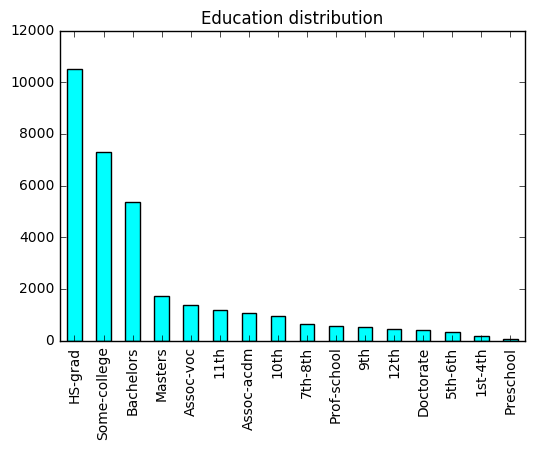

In [17]:
df['education'].value_counts().plot(kind='bar', facecolor = 'cyan')
plt.title('Education distribution')
plt.show()

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

Разведенные люди имеют признак _marital-status_ равный _divorced_.

Среднее значение считает _mean_, а стандартное отклонение - _std_.

In [21]:
print("Среднее равно", df[df['marital-status'] == 'Divorced']['fnlwgt'].mean())

Среднее равно 185802.79045689848


In [35]:
print("Стандартное отклонение равно", df[df['marital-status'] == 'Divorced']['fnlwgt'].std())

Стандартное отклонение равно 105646.78945933603


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

Создадим вспомогательный датасет, который содержит в себе только людей с заработком выше 50k.

In [24]:
df50k = df[df['50K']=='>50K']

Люди с высшим образованием, то есть бакалавры и выше имеют _education-num_ от 13 и выше, то есть нужно посчитать долю таких людей среди всех, кто зарабатывает более 50k.

In [25]:
print("Эта доля равна", len(df50k[df50k['education-num']>12])/len(df50k))

Эта доля равна 0.4985333503379671


Таким образом, их менее 50%, а значит данное утверждение неверно.

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

Для этого просто воспользуемся _groupby_ по двум признакам сразу и выведем _max_ по возрасту, в принципе, комментировать что-то дополнительно смысла нет.

In [65]:
df.groupby(by = ['sex', 'race'])['age'].max()

sex     race              
Female  Amer-Indian-Eskimo    80
        Asian-Pac-Islander    75
        Black                 90
        Other                 74
        White                 90
Male    Amer-Indian-Eskimo    82
        Asian-Pac-Islander    90
        Black                 90
        Other                 77
        White                 90
Name: age, dtype: int64

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

Для начала посмотрим, как называется профессии, чтобы понять, как нам вытаскивать фермеров и рыбаков.

In [54]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

Оказалось, что они объединены в одну профессию _Farming-fishing_. Выведем все _native-country_, которые есть у людей этой профессии.

In [56]:
df[df['occupation']=='Farming-fishing']['native-country'].unique()

array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', '?', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

Выведем также общий список стран, чтобы понять, какие из них есть в датасете, но в них нет фермеров и рыбаков.

In [57]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China',
       'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)',
       'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam',
       'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands'], dtype=object)

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


Сначала сделаем это для мужчин, сделав вспомогательный датасет только из них.

In [27]:
df_male = df[df['sex']=='Male']

In [28]:
print("Для мужчин отношение равно", len(df_male[df_male['education']=='Bachelors'])/len(df_male[df_male['education']=='Masters']))

Для мужчин отношение равно 3.14743049705139


Аналогично сделаем вспомогательный датасет для женщин.

In [30]:
df_female = df[df['sex']=='Female']

In [31]:
print("Для мужчин отношение равно", len(df_female[df_female['education']=='Bachelors'])/len(df_female[df_female['education']=='Masters']))

Для мужчин отношение равно 3.0205223880597014


Таким образом, для мужчин это отношение больше.

### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

Посмотрим на максимальное число рабочих часов в неделю. Это признак _hours-per-week_.

In [32]:
print("Максимальное число рабочих часов в неделю равно", df['hours-per-week'].max())

Максимальное число рабочих часов в неделю равно 99


Выведем количество таких людей.

In [68]:
len(df[df['hours-per-week']==99])

85

А теперь посмотрим, сколько из этого числа зарабатывают меньше 50 тысяч, а сколько - меньше.

In [69]:
df[df['hours-per-week']==99]['50K'].value_counts()

<=50K    60
>50K     25
Name: 50K, dtype: int64

И выведем это текстом.

In [33]:
print("Менее 50 тысяч зарабатывают", df[df['hours-per-week']==99]['50K'].value_counts()[0], "человек")

Менее 50 тысяч зарабатывают 60 человек


In [34]:
print("Более 50 тысяч зарабатывают", df[df['hours-per-week']==99]['50K'].value_counts()[1], "человек")

Более 50 тысяч зарабатывают 25 человек
